# Audio Processing

How does Siri, or any voice assistant, recognize what a user says, transform it from audio into text, understand what was said & what a reasonable response should be, and talk back to you verbally in order to produce an exchange such as the image below? 

<img src="https://www.imore.com/sites/imore.com/files/styles/xlarge/public/field/image/2019/04/check-the-weather-siri.jpg?itok=8dTQLzd-" width=600>

This whole pipeline of voice assistants has multiple complex components. We will get to explore how some of these steps work throughout this project, as well discuss important ethical questions along the way!

<img src="https://img-a.udemycdn.com/course/750x422/1911088_e3f7_4.jpg" width=200>

*To start*, we will be learning the basics of audio signals and signal processing techniques in this notebook.

**Why is this important?**

Firstly, knowing the basics of signal processing will set us up for when we prepare our data and choose features for models.

Also the data augmentation techniques in this notebook can be used to warp recordings of voices to mask sensitive user information such as gender and protect privacy which is a huge issue!

<img src="https://images.idgesg.net/images/article/2019/09/cio_cw_social_engineering_security_privacy_breach_fraud_hands_keyboard_network_avatars_financial_data_by_chainarong_prasertthai_gettyimages-1057890202_2400x1600-100811822-large.jpg" width=300>

Lastly, voice assistants are not just fun tools but extremely useful as *assistive technology* for users who require help doing tasks. For example, a user who can't physically type can use speech to text technology.

<img src="https://gpat.gadoe.org/Georgia-Project-for-Assistive-Technology/PublishingImages/AT%20Logo%20Webpage.JPG" width=300>


*Looking forward to the rest of the project*, we will be working on speech to text prediction and speech synthesis (turning text into speech), experimenting with various models and pre-processing techniques to raise our accuracies. Both of these two steps in the voice assistant pipeline also face their own set of interesting ethical questions.




##Notebook Outline

1. Vocabulary and visualization
2. Spectrograms and Fourier Transform
3. Data Augmentation
4. Ethics
5. Bonus: MFCC

## Audio Waves: The Basics


When an object vibrates, air molecules oscillate and transmit energy to neighboring molecules. This transmission of energy from one molecule to another produces a **sound wave**.

<img src="https://o.quizlet.com/mpjS307ZSDepwLwesA9cvw.jpg" width=350>








### Exercise 1

**Fill in the blanks for the following vocabulary terms:**

*  **Amplitude** : the maximum displacement of air molecules from their rest position
*  **Crest & Trough**: the highest & _________ points in the wave, respectively
*  **Wavelength**: the distance between two _________ or two troughs 
*  **Cycle**: one complete upward and downward movement of the signal (measuring from baseline back to _________)
* **Period**: time of one cycle
* **Frequency**: number of _________ in one second (inverse of period)

The **pitch** and frequency describe the same thing, where pitch is how high or low an audio signal *sounds* when we hear it. The higher the frequency of a wave form (i.e. more frequent cycles), the _________ the pitch of the audible sound.


**Word Bank**: higher, crests, cycles, lowest, baseline

In [1]:
#@title Run for Video
from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/-_xZZt99MzY" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

### Amplitude vs Frequency

Note the distinction between amplitude & frequency: 

Volume (amplitude) is on the top of the image below

Pitch (frequency) is on the bottom of the image below 

<img src="https://static.sciencelearn.org.nz/images/images/000/000/605/full/Graphs-of-sound-waves20151209_v2.jpg?1568601846" width=400>

### Exercise 2

<img  src="https://mdn.mozillademos.org/files/16616/audio-waveform.svg" width=450>


a. How many cycles appear in the graph above?

b. In which cycle does the highest amplitude component appear? How about the lowest amplitude?

c. Which cycle has the highest frequency? And lowest frequency?

## Types of Signals & Sampling

<img src="https://www.allaboutcircuits.com/uploads/articles/An-Introduction-to-Digital-Signal-Processing-(1).png" width=200>


*  **Digital**: *discrete* representation of a signal over time
  (i.e. finite number of samples between two time intervals)
*  **Analog**: *continuous* representation of a signal over time (i.e. an audio signal)

________

**Sampling**

Since an audio signal is analog, or a continuous representation, we convert them to digital signals to require less memory and work with them more easily. This is the idea of **sampling** an audio signal, in which we pick a number of *samples* per second.

For example, if the sampling frequency is 10,000, this means that 10,000 amplitudes were recorded every second. 

<img src="https://www.globalspec.com/ImageRepository/LearnMore/20142/042536fba47d9841442fdb60540601045cf5d.png" width=400>

We will experiment with changing the sampling rate of an audio signal later on, and observe the effects of varying this.

A higher sampling rate is needed for sampling a signal which is rich in high frequency components (like music), compared to the sampling frequency needed for sampling a slowly varying signal.
The **Nyquist-Shannon sampling theorem** says that the *minimum sampling frequency* of a signal that won't distort the underlying information and yield accurate reconstruction back to a continuous signal, is double the frequency of its highest frequency component.



### Exercise 3

What is the highest frequency component of a 1 second audio signal with 40,000 samples?

Is this within the human detectable range?

## Visualizing an audio signal

<img src="https://www.researchgate.net/profile/Donato_Errico/publication/279230959/figure/fig2/AS:323003708657673@1454021493318/Example-of-steady-state-PERGs-of-left-eyes-presented-in-time-domain-line-chart-and.png" width=500>



1.   **Amplitude vs time**

This is often referred to as the time-domain representation of a signal.

Limitation: doesn't show specifics about the rate of cycle change (i.e. ignores frequency)



2.   **Amplitude vs frequency**


Limitation: doesn't show order or sequence of the signal (i.e. ignores time)

3. **Frequency vs time**

This is what is known as a **spectrogram**. 
Each point in a spectrogram represents the amplitude of a particular frequency at a particular time.

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c5/Spectrogram-19thC.png" width=400>

Now, we have a visual way of representing an audio signal's strength (or “loudness”) over time at various frequencies (or pitches). We can see the time on the x axis, frequency on the y axis, and amplitude as the 3rd dimension (represented by the colors in the heatmap).





### Creating a spectrogram

Any *time-varying* signal can be broken down into its *frequency* components, through fourier decomposition, in which the signal is represented as a mixture of *sinusoid* waves with different frequencies. (A sinusoid is any function that can be produced by altering the sine function).


The **Fourier Transform** shows that any waveform can be re-written as the sum of sinusoidal functions.
It is a mathematical concept that can convert a continuous signal from a time-domain to frequency-domain. It decomposes a signal into its frequency components, and doesn't just give the frequencies in the signal, but also the magnitude of each frequency present in the signal.

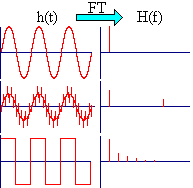

We can see a simple graphic above, converting an analog (continuous) signal as a function of time *t*, into a digital (discrete) signal as a function of frequency *f*.

If you're interested in learning the details about the Fourier Transform, check out this [link](http://www.thefouriertransform.com/)!

One thing to note is the difference between the Fourier Transform and the **Discrete Fourier Transform** which just takes a discrete (sampled) signal as input instead. There is also a concept known as **Fast Fourier Transform** (FFT), which is a more efficient calculation of the same Fourier Transform.

#### Sine Waves & Fourier Transform

To understand the FFT, let's look at a sine wave. Below, we create a sine wave with a **sampling rate of 100, amplitude of 1, and frequency of 3**. (The sampling rate of 100 means there is 100 amplitude measures recorded per 1 second, so there is one amplitude value recorded every 1/100th second). These discrete amplitude values are used to calculate the Discrete Fourier Transform (DFT) of this signal using the FFT algorithm.

##### Exercise 4

Fill in the missing code below:

(Hint: `plt.plot()` is a function to plot in matplotlib).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


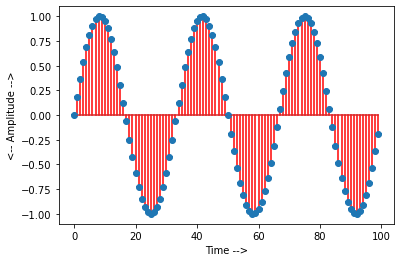

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 100 ### YOUR CODE HERE ###
freq = 3 ### YOUR CODE HERE ###
x = np.arange(num_samples) # like range() but returns ndarray not list
y = np.sin(2 * np.pi * freq * (x / num_samples)) # list of amplitudes

plt.stem(x, y, 'r')

# TODO: plot the sine wave
plt.plot(x, y, '*')

### YOUR CODE HERE ###

plt.xlabel("Time -->")
plt.ylabel("<-- Amplitude -->")
plt.show()

**Discuss**: How many cycles are there in this graph? How do you know that?

##### Exercise 5

Now, we will use the sequence of amplitudes we made for the FFT algorithm below to plot the amplitude vs frequency.

We're using the FFT calculation from [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html).

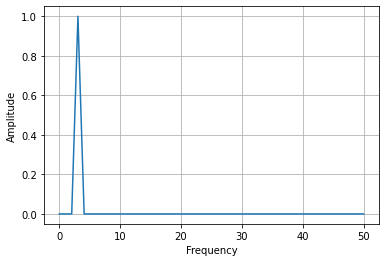

In [3]:
import scipy as sp

def fft_plot(audio, sampling_rate):
  n = len(audio)
  # period (T) is defined as 1 / frequency
  T = 1/sampling_rate ### YOUR CODE HERE ### 
  y = sp.fft.fft(audio)
  x = np.linspace(0, 1/(2*T), n//2) # like arange() but specify start, end, & how many nums (infers step size)
  
  plt.plot(x, 2 / n * np.abs(y[: n//2])) #  can choose any half of y & get abs vals to represent frequencies present in signal
  plt.grid()
  plt.xlabel("Frequency")
  plt.ylabel("Amplitude")
  plt.show()

### TODO: call the function with the correct arguments
fft_plot(y, num_samples)

**Discuss**: How can we interpret this graph?

Why is there only one frequency peak (and what ```x``` value is the peak at)? Why is the amplitude 1?

#### Exercise 6

Let's try one more example of generating a mixture of two different signals.

Create a second signal with a **sampling rate of 100, frequency of 11, and amplitude of 2**.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


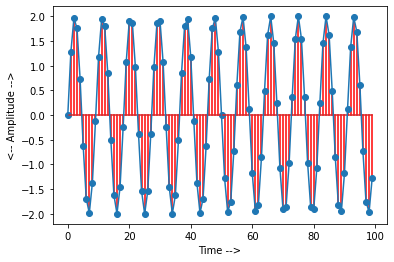

In [4]:
num_samples = 100 ### YOUR CODE HERE ###
freq = 11 ### YOUR CODE HERE ###
x = np.arange(num_samples) ### YOUR CODE HERE ###
y2 = 2 * np.sin(2 * np.pi * freq * (x / num_samples)) # note difference to get amplitude of 2 instead of 1

plt.stem(x, y2, 'r')
plt.plot(x, y2)
plt.xlabel("Time -->")
plt.ylabel("<-- Amplitude -->")
plt.show()

**Discuss**: What does the FFT plot of this sine wave (created by amplitudes in the list `y2`) look like?

The FFT for this sine wave is also a *single* spike, at x = 11 with a height of 2.


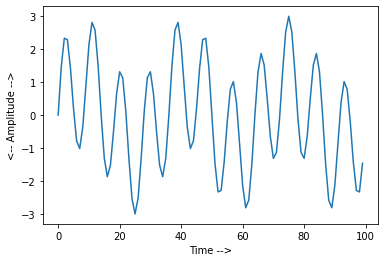

In [5]:
# Mixture of our two sine waves
y3 = y + y2

plt.plot(x, y3)
plt.xlabel("Time -->")
plt.ylabel("<-- Amplitude -->")
plt.show()

##### Exercise 7

Generate the frequency graph for this new combo sine wave from amplitudes stored in the list ```y3```. 

(Hint: which function did we define above to plot the amplitude vs frequency?).

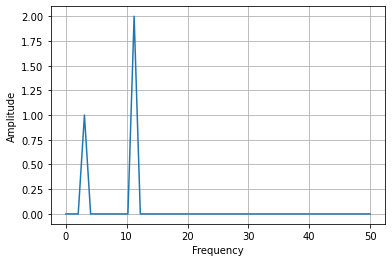

In [6]:
### YOUR CODE HERE ###
fft_plot(y3, num_samples)

Now we see two spikes for the two different frequencies present in the signal. (The presence of one frequency doesn't affect the other frequency in the signal). The amplitudes also correlate with each amplitude in the respective component sine wave.

#### Fourier Transform to Spectrogram

Why do we need a spectrogram anyway?

The time domain, i.e. order or sequence, is important to a speech recognition task. If you have an audio recording of someone saying, "Siri, what time is it?", then the recognition system needs to predict those five words *in order*.

The FFT above breaks down an audio signal into its frequency values (and their corresponding strengths or amplitudes), which can become features for a speech recognition system. However, we lost track of time information from the FFT process. We no longer know which word was spoken in which order, if those frequencies are our features.

This is why **spectrograms** are important!


##### Exercise 8
Let's look at the spectrogram for our last **combo sine wave**. Use scipy's [spectrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html) function with correct arguments (Hint: use `nperseg=15`).

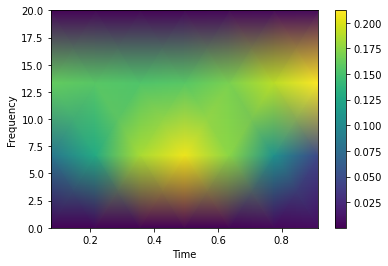

In [7]:
from scipy import signal

freq, time, spect = signal.spectrogram(y3, num_samples, nperseg=15)### YOUR CODE HERE ###
color = plt.pcolormesh(time, freq, spect, shading='gouraud')

# TODO: use plt.ylabel and plt.xlabel with correct arguments
plt.xlabel("Time")
plt.ylabel("Frequency")

plt.ylim(0, 20) # highest frequency value was 11
plt.colorbar(color) # show the amplitude color-coding
plt.show()

**Discuss**: Why does the plot look the way it does? What does the ```nperseg``` parameter do?

Experiment with changing that value & see what effects that has!


### Practice with a real audio clip

We're going to use [libROSA](https://librosa.org/doc/latest/index.html), a python package for music and audio analysis.


In [8]:
#@title Run this code to download the packages & audio file
import librosa
import gdown
import random
from IPython.display import Audio
import IPython.display as ipd
from librosa import display

# !gdown --id 16qujPMvRT7VBGNLDhFfl8QENAnW6xjhc

! wget -O 0ab3b47d_nohash_0.wav 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/Deep%20Dives/Advanced%20Topics%20in%20AI/Sessions%206%20-%2010%20(Projects)/Project%20-%20Audio%20Processing/0ab3b47d_nohash_0.wav'

--2021-07-03 16:34:38--  https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/Deep%20Dives/Advanced%20Topics%20in%20AI/Sessions%206%20-%2010%20(Projects)/Project%20-%20Audio%20Processing/0ab3b47d_nohash_0.wav
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.164.144, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28716 (28K) [audio/wav]
Saving to: ‘0ab3b47d_nohash_0.wav’

0ab3b47d_nohash_0.w 100%[===================>]  28.04K  --.-KB/s    in 0s      

2021-07-03 16:34:38 (123 MB/s) - ‘0ab3b47d_nohash_0.wav’ saved [28716/28716]



Let's listen to the actual recording:

In [9]:
file_path = "0ab3b47d_nohash_0.wav"
Audio(file_path)

You'll hear a woman's voice saying the word 'zero.'

This wav file comes from [TensorFlow's](https://www.tensorflow.org/datasets/catalog/speech_commands)  Speech Commands Dataset, which is also on [Kaggle](https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/data) as a Speech Recognition Challenge. The dataset contains thousands of recordings of roughly 1 second utterances from various people, of twenty words and the digits 0 through 9. 

In [10]:
# Load in the downloaded wav file, returning the array of amplitudes
# & the original sampling frequency used while recording the audio file.

samples, sampling_rate = librosa.load(file_path, sr=None) 
len(samples), sampling_rate

(14336, 16000)

**Discuss**: How many amplitudes were recorded per second for this audio clip? Is this clip longer or shorter than 1 second?

#### Exercise 9


Find the **duration** of this audio clip.

(Hint: how can we use the two values above?)

In [11]:
### YOUR CODE HERE ###
duration = len(samples)/sampling_rate
print(duration)

0.896


This should make sense that there's not quite 16k samples since the recording isn't quite a full second. :)

#### Visualizing the Audio Clip

1. First let's try visualizing this audio recording on a plot showcasing **amplitude vs time**, as we first did with the sine waves above.

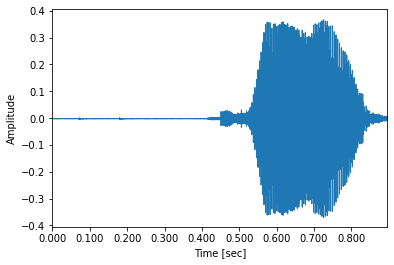

In [12]:
librosa.display.waveplot(y = samples, sr = sampling_rate) # could also do plt.plot(samples)
plt.xlabel("Time [sec]")
plt.ylabel("Amplitude")
plt.show()

2. Let's reuse our function ```fft_plot``` from above to show this audio clip on a plot of **amplitude vs frequency**.

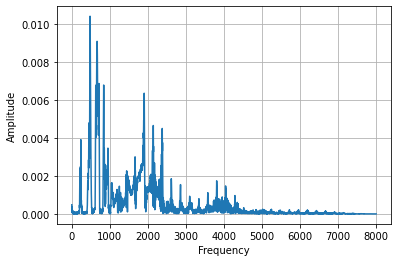

In [13]:
fft_plot(samples, 16000)

**Discuss**:
Using the Nyquist-Shannon sampling theorem and the sampling rate, what is the highest frequency component of this audio clip?

(Hint: look at the x-axis range in the FFT plot above).

3. Lastly, let's take a look at the **spectrogram** of this recording.


<!-- Now we break an audio signal into smaller frames or windows, and calculate DFT (or FFT) for each window. The window number represents time. A spectrogram is just a 2D matrix of frequency magnitudes per time.

For a typical speech recognition task, a window of 20-30ms is a good choice, because humans don't speak more than one [phoneme](https://www.britannica.com/topic/phoneme) in that time window. Windows usually overlap as well, so no frequencies are lost. An overlap of around 50% is standard for speech recognition. -->

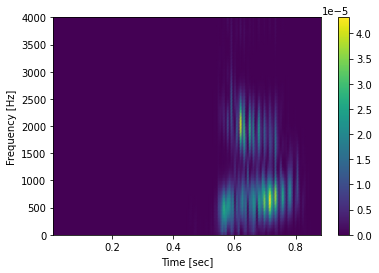

In [14]:
freq, time, spect = signal.spectrogram(samples, fs=16000, window='320', noverlap=160)
color = plt.pcolormesh(time, freq, spect, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim((0,4000))
plt.colorbar(color) # show the amplitude color-coding
plt.show()

Here's an alternate method of showing the spectrogram, using matplotlib's [specgram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.specgram.html) function instead of scipy's:

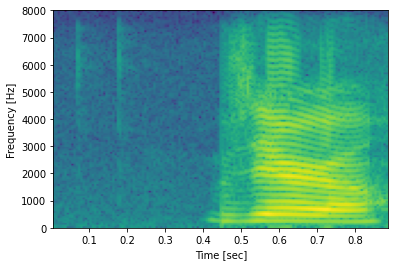

In [15]:
plt.specgram(samples, Fs=16000, noverlap=160)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

## Data Augmentation

Data augmentation is used to generate synthetic data from existing data, to create more diverse examples and improve the generaization of an AI model.

We are going to get practice with various methods to edit an audio signal.

### **1. Noise Injection**

We can add some random value into the data by using numpy, to simulate white noise or background noise. By controlling the amplitude of the noise, so we are still able to detect the word 'zero,' which is the objective.

In [16]:
def inject_noise(audio, noise_factor):
    noise = np.random.randn(len(audio))
    augmented_audio = audio + (noise_factor * noise)
    augmented_audio = augmented_audio.astype(type(audio[0])) # cast back to same type
    return augmented_audio

audio_noise = inject_noise(samples, .1)

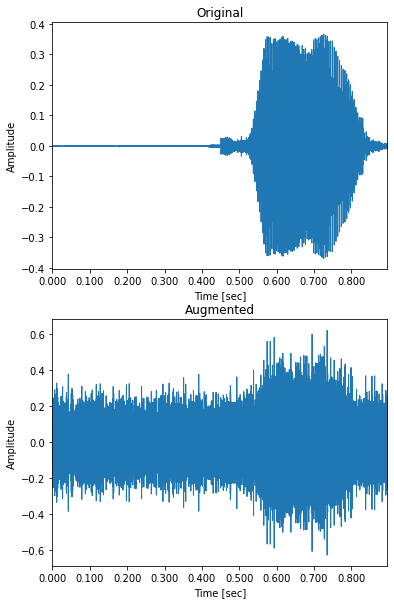

In [17]:
#@title Run to plot original & augmented signal
def plot_both(original, augmented):
  plt.figure(figsize=(6,10))
  plt.subplot(2, 1, 1)
  librosa.display.waveplot(original, sr = sampling_rate)
  plt.xlabel("Time [sec]")
  plt.ylabel("Amplitude")
  plt.title("Original")
  plt.subplot(2, 1, 2)
  librosa.display.waveplot(augmented, sr = sampling_rate)
  plt.xlabel("Time [sec]")
  plt.ylabel("Amplitude")
  plt.title("Augmented")
  plt.show()

plot_both(samples, audio_noise)

In [18]:
#@title Run to listen to augmented audio
ipd.Audio(audio_noise, rate=16000)

#### Exercise 10

Try editing the ``noise_factor`` argument above and see how much you can change the signal while still observing the word 'zero.'

### **2. Time Shifting**

We can shift the audio left or right by a certain amount of time, and the samples can '[roll](https://numpy.org/doc/stable/reference/generated/numpy.roll.html) over' past the beginning or end to wrap around.





In [19]:
audio_shift = np.roll(samples, shift=2500)

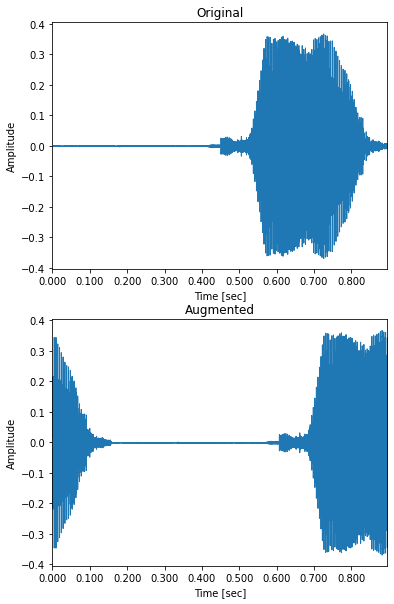

In [20]:
#@title Run to plot original & augmented signal
plot_both(samples, audio_shift)

In [21]:
#@title Run to listen to augmented audio
ipd.Audio(audio_shift, rate=16000)

#### Exercise 11

Experiment with changing the ``shift`` argument (try positive and negative values!).

### **3. Changing Pitch**

We can change the pitch (frequency) of an audio signal with a libROSA function, without affecting the speed.



In [22]:
audio_pitch = librosa.effects.pitch_shift(samples, sampling_rate, n_steps=3)

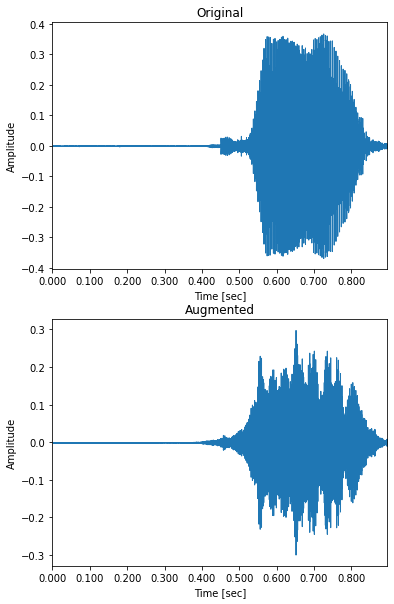

In [23]:
#@title Run to plot original & augmented signal
plot_both(samples, audio_pitch)

In [24]:
#@title Run to listen to augmented audio
ipd.Audio(audio_pitch, rate=16000)

#### Exercise 12

Experiment with changing the ``n_steps`` argument (try positive and negative values!).

### **4. Changing Speed**

Time stretching is the process of changing the speed or duration of an audio signal without affecting its pitch. This is the opposite of the previous one which changed the pitch and not speed.

In [28]:
audio_speed = librosa.effects.time_stretch(samples, rate=2)

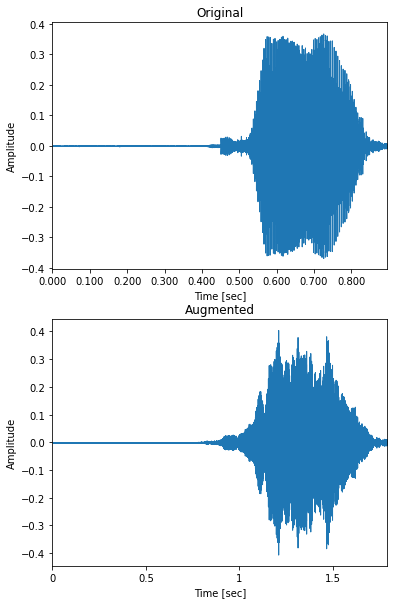

In [26]:
#@title Run to plot original & augmented signal
plot_both(samples, audio_speed)

In [29]:
#@title Run to listen to augmented audio
ipd.Audio(audio_speed, rate=16000)

#### Exercise 13

Experiment with changing the ``rate`` argument above. What possible values can it take?

Take a look at the x axis in the plots and make sure you understand how it changes as well.

### **5. Frequency Masking**

We often want to edit an audio signal by masking out a certain frequency value, or a small range of frequency values. Choosing *how big* of a range and *what* values can be done by a variety of methods.


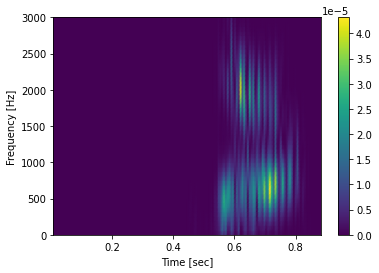

In [30]:
#@title Run to plot original spectrogram
freq, time, spect = signal.spectrogram(samples, fs=16000, window='320', noverlap=160)
color = plt.pcolormesh(time, freq, spect, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim((0,3000))
plt.colorbar(color)
plt.show()

In [41]:
freq_2, time_2, spect_2 = signal.spectrogram(samples, fs=16000, window='320', noverlap=160)

# Choose random frequency value to mask
freq_idx = random.randint(0, 45) # only choosing freq vals in range [0, 2812.5] to show up on plot
# Zero out all amplitudes across every time step for given frequency value
spect_2[freq_idx, :] = 0

print("Masking frequency value {}".format(freq_2[freq_idx]))

Masking frequency value 2062.5


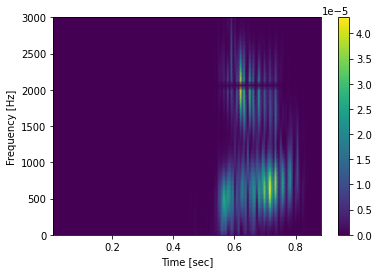

In [42]:
#@title Run to plot masked spectrogram
color = plt.pcolormesh(time_2, freq_2, spect_2, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim((0,3000))
plt.colorbar(color)
plt.show()

#### **Discuss**

Make sure you know why we show the spectrogram here, as opposed to the previous plots of amplitude vs time. Also, ensure you can spot the difference between the original and augmented spectrograms above.

### **6. Time Masking**

Similar to frequency masking, we can edit the spectrogram by zeroing out all amplitude values across all frequencies for a given *time range* of an audio clip. This has the opposite effect on the masked spectrogram, with a vertical line as opposed to horizontal line.

In [50]:
freq_2, time_2, spect_2 = signal.spectrogram(samples, fs=16000, window='320', noverlap=160)

# Choose random time value to mask
time_idx = random.randint(92, 132) # only choosing vals in range [0.56, 0.8] seconds to show up on plot
# Zero out all amplitudes across every frequency value for given time stamp
spect_2[:, time_idx] = 0
spect_2[:, time_idx+1] = 0
spect_2[:, time_idx-1] = 0

print("Masking time values in range [{},{}] seconds".format(time_2[time_idx-1], time_2[time_idx+1]))

Masking time values in range [0.668,0.68] seconds


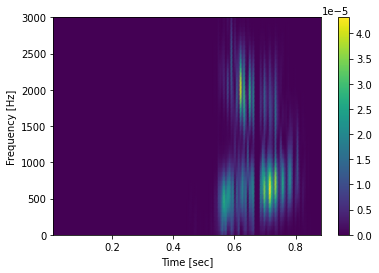

In [51]:
#@title Run to plot masked spectrogram
color = plt.pcolormesh(time_2, freq_2, spect_2, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim((0,3000))
plt.colorbar(color)
plt.show()

### **7. Changing Sampling Rate**

We can use the libROSA function to load in the audio file again, this time with a different sampling rate.

In [52]:
samples_new, sampling_rate_new = librosa.load(file_path, sr=15000)
len(samples_new), sampling_rate_new # original was (14336, 16000)

(13440, 15000)

In [53]:
# Note that the duration will stay the same
duration_new = len(samples_new) / sampling_rate_new
print(str(duration_new) + " seconds") # original was .896 seconds too

0.896 seconds


In [54]:
#@title Run to listen to augmented audio
ipd.Audio(audio_speed, rate=sampling_rate_new)

#### Exercise 14

Try changing the ``sr`` argument above where we load in the audio recording to observe changes in the sound of the augmented clip.

How much can we warp the signal via the sampling rate, while still retaining an observable 'zero' sound?

## Ethics

<img src="https://www.slashgear.com/wp-content/uploads/2019/04/alexa-1280x720.jpg" width=300>

One potential use case for these data augmentation techniques is not only to create more diverse data samples for AI models, but also to address ethical questions present in speech recognition software and personal assistant systems such as Alexa and Siri.

Articles such as [this](https://gcn.com/articles/2019/08/01/audio-masking-smartphone-security.aspx) one explain the necessity of masking user voices on devices to prevent hackers from reconstructing personal information from the sound of someone's voice. Adding background noise, warping the sampling rate, and so on, to the point where even the content of an audio recording is unidentifiable (past what we did) can all be helpful methods to tackle this serious issue.


## Bonus: Feature Building

Any automatic speech recognition system needs to extract features, in other words, identify the important components of an audio signal to identify linguistic content & ignore irrelevant things such as background noise.

We're going to explore one common feature that is used in speech recognition tasks.

### Mel Frequency Cepstral Coefficient (MFCC)

<img src = "https://miro.medium.com/max/2504/1*ObZV1Ay9CTH4YJPySIPpWA.png" width = 400>

MFCC is a feature typically used in automatic speech recognition, and the Mel scale is a measure relating *perceived* frequency (pitch) to *actual* frequency. MFCCs are a transformation on spectrograms and are meant to capture characteristics of human speech better (as compared to music or other applications). A *spectrogram* uses a linear spaced frequency scale (i.e. each frequency bin is spaced an equal number of Hertz apart), while an *MFCC* uses a quasi-logarithmic spaced frequency scale, which is more similar to how the human auditory system processes sounds.

MFCCs are similar to taking a Fourier Transform (spectrogram) of a signal, but MFCCs use Mel scaling to try to model the way humans perceive sounds instead of describing a signal on a purely frequency basis.

MFCC takes into account human perception for sensitivity at appropriate frequencies by converting the conventional frequency (Hz) scale to Mel Scale. 

This is done by taking the log of the magnitude of the Fourier spectrum, and then again taking the spectrum of this log with a cosine transformation.

We can see the distinction between the original waveform, spectrum, and cepstrum below:

<img src="https://www.phon.ucl.ac.uk/courses/spsci/matlab/lect10_files/image001.jpg" width=350>






Fun facts: 

1. Humans are better at detecting small changes in pitch at *low* frequencies than they are at *high* frequencies.

2. The word 'cepstrum' comes from the word 'spectrum' but reverses the 'spec' because a Mel Frequency Cepstrum (MFC) is a spectrum of the log of the spectrum of a time signal.

3. Cepstrum was first used to analyze siesmic signals from earthquakes.

Let's walk through how to calculate the MFCC's for our audio signal of the woman saying the word 'zero':

**1. Normalize the audio:**

In [55]:
# TODO: normalize the samples by dividing each sample by the maximum (positive) amplitude value
samples_norm = ### YOUR CODE HERE ###

# Observe same wav plot as original (samples v samples_norm), except y axis is -1 to 1.
librosa.display.waveplot(y = samples_norm, sr = sampling_rate)
plt.xlabel("Time -->")
plt.ylabel("<-- Amplitude -->")
plt.show()

SyntaxError: ignored

**2. Audio Framing**

We divide the signal into overlapping frames, so that the frames have some correlation between them and so we don't lose information on the edge of each frame.

Framing the signal assures the audio is periodic (i.e. completes a pattern).

In [ ]:
#@title Run to define the frame_audio function
def frame_audio(audio, sample_rate, frame_size=2048, hop_size=10):
    # hop_size is in ms
    
    audio = np.pad(audio, int(frame_size / 2), mode='reflect')
    frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
    num_frames = int((len(audio) - frame_size) / frame_len) + 1
    frames = np.zeros((num_frames, frame_size))
    
    for n in range(num_frames):
        frames[n] = audio[n*frame_len:n*frame_len+frame_size]
    
    return frames

In [ ]:
# TODO: use the frame_audio function with correct arguments
frames = ### YOUR CODE HERE ###
print("Framed audio shape: {}".format(frames.shape)) # framed audio matrix with size (num_frames x frame_size).

**3. Time --> Frequency Domain**

To make the audio continuous, we first apply a window function on every frame to avoid high frequency distortions (and have both ends of the signal close to zero) and then perform FFT (Fast Fourier Transform).

Note: the FFT size is the same as the frame_size from above.

**a. Window function**

In [ ]:
from scipy.signal import get_window

FFT_size = frames.shape[1]
window = get_window("hann", FFT_size, fftbins=True)
plt.figure(figsize=(10,2))
plt.plot(window)
plt.grid(True)

In [ ]:
audio_win = frames * window

ind = 62 # play around with different frames you want to look at!
plt.figure(figsize=(15,6))
plt.subplot(2, 1, 1)
plt.plot(frames[ind])
plt.title('Original Frame')
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(audio_win[ind])
plt.title('Frame After Windowing')
plt.grid(True)

**b. FFT**

We only take the positive portion of the spectrum.

In [ ]:
#@title Run to produce audio_fft
import scipy.fftpack as fft

audio_fft = np.empty((int(1 + FFT_size // 2), audio_win.T.shape[1]), dtype=np.complex64, order='F')

for n in range(audio_fft.shape[1]):
    audio_fft[:, n] = fft.fft(audio_win.T[:, n], axis=0)[:audio_fft.shape[0]]

audio_fft = np.transpose(audio_fft)

**4. Calculate the signal power**

In [ ]:
audio_power = np.square(np.abs(audio_fft))

# TODO: print the shape of audio_power
### YOUR CODE HERE ###

**Discuss**: Why is each frame size shape now 1025?

Answer: It is from taking only half of the spectrum (the positive portion), i.e. the first half + 1.

**5. MEL-spaced filterbank**

We compute the MEL-spaced filterbank and then pass the framed audio through them, which gives us information about the *power in each frequency band*.

Let's recall the minimum and maximum frequencies present in our audio signal. (Hint: what does the Nyquist-Shannon sampling theorem tell us about  `freq_high`?).

In [ ]:
freq_min = ### YOUR CODE HERE ###
freq_high = ### YOUR CODE HERE ###

print("Minimum frequency: {}".format(freq_min))
print("Maximum frequency: {}".format(freq_high))

In [ ]:
#@title Run to compute filter points
mel_filter_num = 10
def freq_to_mel(freq):
    return 2595.0 * np.log10(1.0 + freq / 700.0)

def mel_to_freq(mels):
    return 700.0 * (10.0**(mels / 2595.0) - 1.0)

def get_filter_points(fmin, fmax, mel_filter_num, FFT_size, sampling_rate):
  fmin_mel = freq_to_mel(fmin)
  fmax_mel = freq_to_mel(fmax)

  print("MEL min: {0}".format(fmin_mel))
  print("MEL max: {0}".format(fmax_mel))

  mels = np.linspace(fmin_mel, fmax_mel, num=mel_filter_num+2)
  freqs = mel_to_freq(mels)

  return np.floor((FFT_size + 1) / sampling_rate * freqs).astype(int), freqs

filter_points, mel_freqs = get_filter_points(freq_min, freq_high, mel_filter_num, FFT_size, sampling_rate)

In [ ]:
#@title Run to construct filterbank
def get_filters(filter_points, FFT_size):
  filters = np.zeros((len(filter_points)-2,int(FFT_size/2+1)))
  
  for n in range(len(filter_points)-2):
      filters[n, filter_points[n] : filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
      filters[n, filter_points[n + 1] : filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[n + 1])
  
  return filters

filters = get_filters(filter_points, FFT_size)

plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

In [ ]:
#@title Run to normalize the filters

enorm = 2.0 / (mel_freqs[2:mel_filter_num+2] - mel_freqs[:mel_filter_num])
filters *= enorm[:, np.newaxis]

plt.figure(figsize=(15,4))
for n in range(filters.shape[0]):
    plt.plot(filters[n])

**6. Filter the signal**

In [ ]:
audio_filtered = np.dot(filters, np.transpose(audio_power))
audio_log = 10.0 * np.log10(audio_filtered)
audio_log.shape

Now, this ``audio_log`` matrix represents the audio power in all 10 filters in different time frames.

**7. Generate the Cepstral Coefficients**

To do this, we use the Discrete Cosine Transform (DCT).

In [ ]:
#@title Run this for the DCT
def dct(dct_filter_num, filter_len):
    basis = np.empty((dct_filter_num,filter_len))
    basis[0, :] = 1.0 / np.sqrt(filter_len)
    
    samples = np.arange(1, 2 * filter_len, 2) * np.pi / (2.0 * filter_len)

    for i in range(1, dct_filter_num):
        basis[i, :] = np.cos(i * samples) * np.sqrt(2.0 / filter_len)
        
    return basis

dct_filter_num = 40

dct_filters = dct(dct_filter_num, mel_filter_num)

cepstral_coefficents = np.dot(dct_filters, audio_log)
cepstral_coefficents.shape

Now we have 40 MFCC's for each of the 90 timeframes.

In [ ]:
plt.figure(figsize=(15,5))
plt.xlabel("Frame Number")
plt.ylabel("Coefficient Value")
plt.plot(np.linspace(0, len(samples) / sampling_rate, num=len(samples)), samples)
plt.imshow(cepstral_coefficents, aspect='auto', origin='lower')
plt.colorbar()

We can see that the MFCC algorithm extracts high frequency and low frequency information, by frame.